# 17. 量子并行 & 量子叠加

到目前为止，我们的讨论相当笼统。适用于大多数量子算法的框架。现在，是时候研究一些“真实”量子算法的细节了，但这些算法可能并不“实用”，因为我们只是试图证明量子计算的想法。我们首先需要理清的是，量子计算机是如何进行经典计算的。在这里，重要的一点是 Toffoli 门对于经典计算机是“通用的”。想象一下，我们有一个经典电路，带有 AND、OR、NOT 等逻辑门，其想法是用 Toffoli 门（连同一些辅助位）替换每个逻辑门。

有两个问题需要弄清楚。

- 首先，经典计算是不可逆的（信息丢失），但量子计算是可逆的（信息守恒）。

- 其次，一些经典计算涉及随机性。

这两个问题都可以通过量子计算来克服，方法是保留信息并使用量子测量，例如在$|+\rangle$态上测量。

## Toffoli 门

让我们看一下toffoli门的逻辑表。

![Toffoli gate logic table](images/Toffoli_logic_table.png)

【事实】与非门（NAND 门）（与门 后接 非门）对于经典计算是通用的。这足以证明如果Toffoli 门可以模拟与非门，那么Toffoli 门对于经典计算也是通用的。

![NAND gate](images/NAND_gate.png)

为了检查，让我们看一下 NAND 逻辑表：

![NAND logic table](images/NAND_logic_table.png)

由于 Toffoli 门可以使用基本量子门构建，因此经典计算可以被量子计算机实现。需要注意的是，量子计算机执行经典计算将会产生额外的开销。

一个很好的类比：量子计算机确实可以模拟经典计算，但量子计算机不太可能取代经典计算机。为什么？就像飞机都可以像汽车一样操作，但我们不会用飞机代替汽车。

## 量子并行

当我还是一名研究生时，我是团队中唯一从事量子计算的人。在一次组会上，我试图解释量子计算，然后我写了这个（$x \in \{ 0,1 \}^n$）：
$$
\boxed{
|x\rangle |0\rangle \rightarrow |x\rangle |f(x)\rangle
}
$$

组里的其他人对此很满意，但是当我以叠加的形式写出来时：
$$
\boxed{
\sum_x |x\rangle |0\rangle \rightarrow \sum_x |x\rangle |f(x)\rangle
}
$$
他们不相信这是真的。

或许我应该评论一下：量子计算机可以做这样的事情吗？$|x\rangle \rightarrow |f(x)\rangle$ 但这通常是不可逆的。

实际上，我们需要的是一些辅助量子比特。因此，我们实际上需要执行以下操作：
$$
|x\rangle|0\rangle|0\rangle_{a n c} \rightarrow|x\rangle|f(x)\rangle|g(x)\rangle_{a n c} \rightarrow|x\rangle|f(x)\rangle
$$
这仍然是一个简化版本。可能最好的方法是通过一些明确的例子来说明。例如，如果要执行的逻辑操作恰好是与非门。

- 单一状态：
$$
|ab\rangle |1\rangle \rightarrow |ab\rangle |1+ab\rangle
$$

- 叠加：
$$
(|00\rangle+|01\rangle+|10\rangle+|11\rangle)|1\rangle \rightarrow|00\rangle|1\rangle+|01\rangle|1\rangle+|10\rangle|1\rangle+|11\rangle|0\rangle
$$

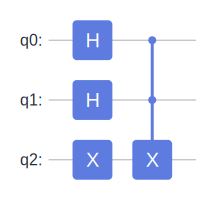

In [1]:
from mindquantum.core.circuit import Circuit
from mindquantum.core.gates import X, H

circ = Circuit()
circ += H.on(0)
circ += H.on(1)
circ += X.on(2)
circ += X.on(2, [1, 0])
circ.svg()

$q_0$、$q_1$是输入比特，$q_2$是输出比特。现在按照$|q_0 q_1 q_2\rangle$的顺序打印量子态，即得到叠加情况下的$|ab\rangle |1+ab\rangle$：

In [2]:
print(circ.reverse_qubits().get_qs(ket=True))

1/2¦001⟩
1/2¦011⟩
1/2¦101⟩
1/2¦110⟩


现在，想象一下，如果我们需要进一步处理输出的量子比特，
$$
|a b\rangle|1\rangle \rightarrow|a b\rangle|1+a b\rangle|1\rangle \rightarrow|a b\rangle \enspace |1+a b\rangle \enspace |1+a(1+a b)\rangle
$$

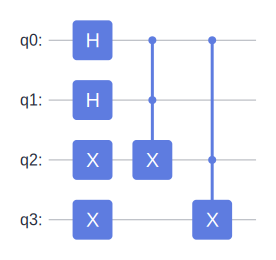

In [3]:
circ += X.on(3)
circ += X.on(3, [0, 2])
circ.svg()

现在$q_0$、$q_1$是输入比特，$q_2$是辅助比特，$q_3$是输出比特。但这样中间部分会出现叠加问题：
$$
\begin{array}{c}
(|00\rangle|1\rangle+|01\rangle|1\rangle+|10\rangle|1\rangle+|11\rangle|0\rangle)|1\rangle \\ \\
\rightarrow|00\rangle|1\rangle|1\rangle+|01\rangle|1\rangle|1\rangle+|10\rangle|1\rangle|0\rangle+|11\rangle|0\rangle|1\rangle \\ \\
|00\rangle|g(00)\rangle_{a n c}|f(00)\rangle+|01\rangle|g(01)\rangle_{a n c}|f(01)\rangle+|10\rangle|g(10)\rangle_{a n c}|f(10)\rangle+|11\rangle|g(11)\rangle_{a n c}|f(11)\rangle
\end{array}
$$
这里的函数$f$就是我们想要应用的逻辑操作，即应用两个与非门，但是辅助量子比特$q_2$会与输入量子比特$q_0$、$q_1$纠缠在一起，如下所示。

In [4]:
print(circ.reverse_qubits().get_qs(ket=True))

1/2¦0011⟩
1/2¦0111⟩
1/2¦1010⟩
1/2¦1101⟩


要摆脱它，我们可以再次应用 Toffoli 门。

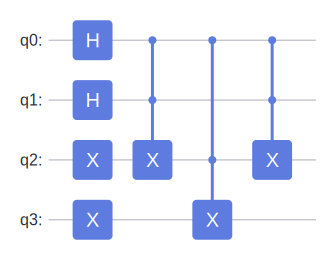

In [5]:
circ += X.on(2, [0, 1])
circ.svg()

In [6]:
print(circ.reverse_qubits().get_qs(ket=True))

1/2¦0011⟩
1/2¦0111⟩
1/2¦1010⟩
1/2¦1111⟩


可以看到，辅助比特$q_2$现在恢复了初始状态。

### 量子叠加

对于一个单量子比特，我们知道
$$
H|0\rangle = (|0\rangle+|1\rangle)/\sqrt{2}
$$

对于两个量子比特：
$$
H^{\otimes 2}|00\rangle=(|0\rangle+|1\rangle)(|0\rangle+|1\rangle) / 2=(|00\rangle+|01\rangle+|10\rangle+|11\rangle) / 2
$$

对于多量子比特，
$$
H^{\otimes n}\left|0^{n}\right\rangle=\frac{1}{\sqrt{2^{n}}} \sum_{x \in\{0,1\}^{n}}|x\rangle
$$

在$n$个量子比特上使用$n$个 Hadmard 门，可以创建具有 $2^n$ 输入项的量子叠加。指数希尔伯特空间是使其成为经典模拟难题的必要条件（但不是充分条件）。

结合前面的讨论，我们可以断言存在一个幺正的电路$U_f$，这样
$$
\boxed{
\sum_{x} a_{x} U_{f}|x\rangle|0\rangle=\sum_{x} a_{x}|x\rangle|f(x)\rangle
}
$$
其中$f(x)$是一些可以表示为经典电路的函数。

In [7]:
from show_info import InfoTable

InfoTable('mindquantum')